In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pickle
from matplotlib import pyplot as plt
import statsmodels.api as sm
from matplotlib.ticker import Formatter
import os
import glob

server = "zs_94_03"
readPath = os.path.join(r'\\192.168.10.30\Kevin_zhenyu\check\20200306', server)
dataPathLs = np.array(glob.glob(os.path.join(readPath,'full_20200306***.tar.gz')))
accountLs = np.array([os.path.basename(i).split('_')[6].split('.')[0] for i in dataPathLs])
path = []
for i in accountLs:
    dataPathLs = np.array(glob.glob(os.path.join(readPath, "full_20200306_" + server + '_day_' + i, "mdLog_SZ***")))
    for j in dataPathLs:
        if (int(os.path.basename(j).split('_')[3].split('.')[0]) <= 1456):
            path.append(j)
display(path)
if len(path) == 2:
    logSZ1 = pd.read_csv(path[0], encoding="utf-8").loc[:, ["clockAtArrival", "sequenceNo", "source", "StockID",
                                              "exchange", "time", "cum_volume", "cum_amount", "close",
                                              "bid1p", "bid2p", "bid3p", "bid4p", "bid5p", "bid1q",
                                              "bid2q", "bid3q", "bid4q", "bid5q", "ask1p", "ask2p",
                                              "ask3p", "ask4p", "ask5p", "ask1q", "ask2q", "ask3q",
                                              "ask4q", "ask5q", "openPrice"]]
    logSZ2 = pd.read_csv(path[1], encoding="utf-8").loc[:, ["clockAtArrival", "sequenceNo", "source", "StockID",
                                              "exchange", "time", "cum_volume", "cum_amount", "close",
                                              "bid1p", "bid2p", "bid3p", "bid4p", "bid5p", "bid1q",
                                              "bid2q", "bid3q", "bid4q", "bid5q", "ask1p", "ask2p",
                                              "ask3p", "ask4p", "ask5p", "ask1q", "ask2q", "ask3q",
                                              "ask4q", "ask5q", "openPrice"]]
    logSZ1["exes"] = int(accountLs[0])
    logSZ2["exes"] = int(accountLs[1])
    print(logSZ1["time"].iloc[0])
    print(logSZ2["time"].iloc[0])

if len(path) == 3:
    logSZ1 = pd.read_csv(path[0], encoding="utf-8").loc[:, ["clockAtArrival", "sequenceNo", "source", "StockID",
                                              "exchange", "time", "cum_volume", "cum_amount", "close",
                                              "bid1p", "bid2p", "bid3p", "bid4p", "bid5p", "bid1q",
                                              "bid2q", "bid3q", "bid4q", "bid5q", "ask1p", "ask2p",
                                              "ask3p", "ask4p", "ask5p", "ask1q", "ask2q", "ask3q",
                                              "ask4q", "ask5q", "openPrice"]]
    logSZ2 = pd.read_csv(path[1], encoding="utf-8").loc[:, ["clockAtArrival", "sequenceNo", "source", "StockID",
                                              "exchange", "time", "cum_volume", "cum_amount", "close",
                                              "bid1p", "bid2p", "bid3p", "bid4p", "bid5p", "bid1q",
                                              "bid2q", "bid3q", "bid4q", "bid5q", "ask1p", "ask2p",
                                              "ask3p", "ask4p", "ask5p", "ask1q", "ask2q", "ask3q",
                                              "ask4q", "ask5q", "openPrice"]]
    logSZ3 = pd.read_csv(path[2], encoding="utf-8").loc[:, ["clockAtArrival", "sequenceNo", "source", "StockID",
                                              "exchange", "time", "cum_volume", "cum_amount", "close",
                                              "bid1p", "bid2p", "bid3p", "bid4p", "bid5p", "bid1q",
                                              "bid2q", "bid3q", "bid4q", "bid5q", "ask1p", "ask2p",
                                              "ask3p", "ask4p", "ask5p", "ask1q", "ask2q", "ask3q",
                                              "ask4q", "ask5q", "openPrice"]]
    logSZ1["exes"] = int(accountLs[0])
    logSZ2["exes"] = int(accountLs[1])
    logSZ3["exes"] = int(accountLs[2])
    print(logSZ1["time"].iloc[0])
    print(logSZ2["time"].iloc[0])
    print(logSZ3["time"].iloc[0])

['\\\\192.168.10.30\\Kevin_zhenyu\\check\\20200306\\zs_94_03\\full_20200306_zs_94_03_day_9448\\mdLog_SZ_20200306_0831.csv',
 '\\\\192.168.10.30\\Kevin_zhenyu\\check\\20200306\\zs_94_03\\full_20200306_zs_94_03_day_9451\\mdLog_SZ_20200306_0831.csv',
 '\\\\192.168.10.30\\Kevin_zhenyu\\check\\20200306\\zs_94_03\\full_20200306_zs_94_03_day_9454\\mdLog_SZ_20200306_0831.csv']

08:31:36.000
08:31:36.000
08:32:36.000


In [4]:
import pandas as pd
import random
import numpy as np
import glob
import os
import pickle

server = "zs_94_03"
readPath = "E:\\"
dataPathLs = []

dataPathLs = np.array(glob.glob(readPath + "sec_***_" + server + ".csv"))

df = pd.read_csv(dataPathLs[0], encoding="utf-8")
sl = df[df["inStrategy"] == 1]["secName"].str[2:].astype(int).values
print(df[df["inStrategy"] == 1]["secName"].str[:2].unique())

for i in dataPathLs[1:]:
    df = pd.read_csv(i, encoding="utf-8")
    list1 = df[df["inStrategy"] == 1]["secName"].str[2:].astype(int).values
    sl = list(set(sl) | set(list1))

['SZ']


In [5]:
if len(logSZ1["time"].iloc[0]) == 12:
    if len(path) == 2:
        logSZ1["time"] = logSZ1["time"].apply(lambda x: int((x.replace(':', "")).replace(".", "")))
        logSZ2["time"] = logSZ2["time"].apply(lambda x: int((x.replace(':', "")).replace(".", "")))
        logSZ1 = logSZ1[(logSZ1["time"] >= 93000000) & (logSZ1["time"] <= 145655000)]
        logSZ2 = logSZ2[(logSZ2["time"] >= 93000000) & (logSZ2["time"] <= 145655000)]
        logSZ1 = logSZ1[logSZ1["StockID"].isin(sl)]
        logSZ2 = logSZ2[logSZ2["StockID"].isin(sl)]
        l1 = logSZ1["StockID"].unique()
        l2 = logSZ2["StockID"].unique()
        c12 = list(set(l1) & set(l2))
        display(len(l1))
        display(len(l2))    
        display(len(c12))
    if len(path) == 3:
        logSZ1["time"] = logSZ1["time"].apply(lambda x: int((x.replace(':', "")).replace(".", "")))
        logSZ2["time"] = logSZ2["time"].apply(lambda x: int((x.replace(':', "")).replace(".", "")))
        logSZ3["time"] = logSZ3["time"].apply(lambda x: int((x.replace(':', "")).replace(".", "")))
        logSZ1 = logSZ1[(logSZ1["time"] >= 93000000) & (logSZ1["time"] <= 145655000)]
        logSZ2 = logSZ2[(logSZ2["time"] >= 93000000) & (logSZ2["time"] <= 145655000)]
        logSZ3 = logSZ3[(logSZ3["time"] >= 93000000) & (logSZ3["time"] <= 145655000)]
        logSZ1 = logSZ1[logSZ1["StockID"].isin(sl)]
        logSZ2 = logSZ2[logSZ2["StockID"].isin(sl)]
        logSZ3 = logSZ3[logSZ3["StockID"].isin(sl)]
        l1 = logSZ1["StockID"].unique()
        l2 = logSZ2["StockID"].unique()
        l3 = logSZ3["StockID"].unique()
        c123 = list(set(l1) & set(l2) & set(l3))
        display(len(l1))
        display(len(l2))
        display(len(l3))
        display(len(c123))
        
if len(logSZ1["time"].iloc[0]) == 8:
    if len(path) == 2:
        logSZ1["time"] = logSZ1["time"].apply(lambda x: int((x.replace(':', ""))))
        logSZ2["time"] = logSZ2["time"].apply(lambda x: int((x.replace(':', ""))))
        logSZ1["time"] = logSZ1["time"] * 1000
        logSZ2["time"] = logSZ2["time"] * 1000
        logSZ1 = logSZ1[(logSZ1["time"] >= 93000000) & (logSZ1["time"] <= 145655000)]
        logSZ2 = logSZ2[(logSZ2["time"] >= 93000000) & (logSZ2["time"] <= 145655000)]
        logSZ1 = logSZ1[logSZ1["StockID"].isin(sl)]
        logSZ2 = logSZ2[logSZ2["StockID"].isin(sl)]
        l1 = logSZ1["StockID"].unique()
        l2 = logSZ2["StockID"].unique()
        c12 = list(set(l1) & set(l2))
        display(len(l1))
        display(len(l2))    
        display(len(c12))
    if len(path) == 3:
        logSZ1["time"] = logSZ1["time"].apply(lambda x: int((x.replace(':', ""))))
        logSZ2["time"] = logSZ2["time"].apply(lambda x: int((x.replace(':', ""))))
        logSZ3["time"] = logSZ3["time"].apply(lambda x: int((x.replace(':', ""))))
        logSZ1["time"] = logSZ1["time"] * 1000
        logSZ2["time"] = logSZ2["time"] * 1000
        logSZ3["time"] = logSZ3["time"] * 1000
        logSZ1 = logSZ1[(logSZ1["time"] >= 93000000) & (logSZ1["time"] <= 145655000)]
        logSZ2 = logSZ2[(logSZ2["time"] >= 93000000) & (logSZ2["time"] <= 145655000)]
        logSZ3 = logSZ3[(logSZ3["time"] >= 93000000) & (logSZ3["time"] <= 145655000)]
        logSZ1 = logSZ1[logSZ1["StockID"].isin(sl)]
        logSZ2 = logSZ2[logSZ2["StockID"].isin(sl)]
        logSZ3 = logSZ3[logSZ3["StockID"].isin(sl)]
        l1 = logSZ1["StockID"].unique()
        l2 = logSZ2["StockID"].unique()
        l3 = logSZ3["StockID"].unique()
        c123 = list(set(l1) & set(l2) & set(l3))
        display(len(l1))
        display(len(l2))
        display(len(l3))
        display(len(c123))

1418

1418

1418

1418

TypeError: object of type 'numpy.int64' has no len()

'1. time distribution:'

count    5.128505e+06
mean     1.196492e+08
std      1.870911e+07
min      9.300000e+07
10%      9.494500e+07
20%      1.011150e+08
30%      1.034240e+08
40%      1.100030e+08
50%      1.125570e+08
60%      1.321120e+08
70%      1.345450e+08
80%      1.410420e+08
90%      1.435180e+08
max      1.456540e+08
Name: time1, dtype: float64

'2. jitter quantile(.5) and jitter distribution:'

29.0

count    5.128505e+06
mean     4.860556e+01
std      7.288349e+01
min      0.000000e+00
10%      8.000000e+00
20%      1.300000e+01
30%      1.700000e+01
40%      2.300000e+01
50%      2.900000e+01
60%      3.700000e+01
70%      4.900000e+01
80%      7.100000e+01
90%      1.190000e+02
max      1.366800e+04
Name: jitter, dtype: float64

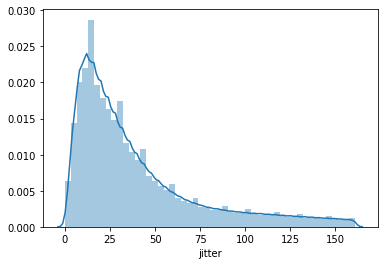

"3. check mornings and afternoons are the same, check numbers don't change across days"

,caa1,sequenceNo_x,source_x,StockID,exchange_x,time1,cum_volume,cum_amount,close,bid1p,...,caa3,sequenceNo,source,exchange,time3,exes,caa_max,caa_min,jitter,faster
24,1583458196891564,3108402,3,45,SZ,93000000,65700,527616.00,8.06,8.03,...,1583458196891620,3104257,3,SZ,93000000,9454,1583458196891632,1583458196891564,68,9448
25,1583458196891568,3108404,3,61,SZ,93000000,853300,5913471.00,6.95,6.92,...,1583458196891624,3104259,3,SZ,93000000,9454,1583458196891639,1583458196891568,71,9448
26,1583458196891570,3108405,3,46,SZ,93000000,324600,1519056.00,4.67,4.67,...,1583458196891627,3104260,3,SZ,93000000,9454,1583458196891641,1583458196891570,71,9448
27,1583458196891577,3108407,3,50,SZ,93000000,106200,1746954.00,16.45,16.42,...,1583458196891632,3104262,3,SZ,93000000,9454,1583458196891649,1583458196891577,72,9448
31,1583458196904109,3111551,3,60,SZ,93000000,487800,1912176.00,3.92,3.92,...,1583458196904110,3107406,3,SZ,93000000,9454,1583458196904214,1583458196904109,105,9448
32,1583458196904112,3111552,3,63,SZ,93000000,1921165,97060373.15,50.60,50.60,...,1583458196904113,3107407,3,SZ,93000000,9454,1583458196904219,1583458196904112,107,9448
34,1583458196904193,3111574,3,153,SZ,93000000,73500,521850.00,7.10,7.08,...,1583458196904212,3107429,3,SZ,93000000,9454,1583458196904314,1583458196904193,121,9448
40,1583458196908270,3112687,3,96,SZ,93000000,12400,138012.00,11.13,11.14,...,1583458196908274,3108542,3,SZ,93000000,9454,1583458196908795,1583458196908270,525,9448
41,1583458196908277,3112688,3,151,SZ,93000000,74900,674096.00,8.98,8.97,...,1583458196908278,3108543,3,SZ,93000000,9454,1583458196908800,1583458196908277,523,9448
48,1583458196908680,3112700,3,159,SZ,93000000,135803,738771.32,5.44,5.44,...,1583458196908691,3108555,3,SZ,93000000,9454,1583458196908852,1583458196908680,172,9448


,caa1,sequenceNo_x,source_x,StockID,exchange_x,time1,cum_volume,cum_amount,close,bid1p,...,caa3,sequenceNo,source,exchange,time3,exes,caa_max,caa_min,jitter,faster
2638538,1583470796804094,88132370,4,4,SZ,130000000,7203195,2.968101e+08,42.99,42.88,...,1583470796804207,88130155,4,SZ,130000000,9454,1583470796804207,1583470796804094,113,9448
2638539,1583470796804101,88132371,4,1,SZ,130000000,76490573,1.158985e+09,15.18,15.17,...,1583470796804213,88130156,4,SZ,130000000,9454,1583470796804213,1583470796804101,112,9448
2638540,1583470796804108,88132373,4,5,SZ,130000000,6453878,1.956166e+07,3.05,3.04,...,1583470796804226,88130158,4,SZ,130000000,9454,1583470796804226,1583470796804108,118,9448
2638541,1583470796804113,88132374,4,6,SZ,130000000,11205783,5.586571e+07,4.97,4.96,...,1583470796804229,88130159,4,SZ,130000000,9454,1583470796804229,1583470796804113,116,9448
2638542,1583470796804119,88132376,4,26,SZ,130000000,4022521,3.887422e+07,9.70,9.69,...,1583470796804236,88130161,4,SZ,130000000,9454,1583470796804236,1583470796804119,117,9448
2638543,1583470796804126,88132378,4,32,SZ,130000000,2230061,4.126425e+07,18.50,18.50,...,1583470796804240,88130163,4,SZ,130000000,9454,1583470796804240,1583470796804126,114,9448
2638544,1583470796804132,88132379,4,7,SZ,130000000,6949091,6.376595e+07,9.25,9.24,...,1583470796804245,88130164,4,SZ,130000000,9454,1583470796804245,1583470796804132,113,9448
2638545,1583470796811593,88133147,3,9,SZ,130000000,78731448,6.288162e+08,8.07,8.06,...,1583470796811659,88130932,3,SZ,130000000,9454,1583470796811765,1583470796811593,172,9448
2638546,1583470796811605,88133149,3,14,SZ,130000000,1964906,1.710582e+07,8.71,8.71,...,1583470796811666,88130934,3,SZ,130000000,9454,1583470796811774,1583470796811605,169,9448
2638547,1583470796811607,88133150,3,17,SZ,130000000,5319727,2.264568e+07,4.32,4.31,...,1583470796811669,88130935,3,SZ,130000000,9454,1583470796811776,1583470796811607,169,9448


,caa1,sequenceNo_x,source_x,StockID,exchange_x,time1,cum_volume,cum_amount,close,bid1p,...,caa3,sequenceNo,source,exchange,time3,exes,caa_max,caa_min,jitter,faster
7,1583458196889217,3107906,3,2,SZ,93000000,460900,14660845.00,31.86,31.83,...,1583458196889207,3103761,3,SZ,93000000,9454,1583458196889217,1583458196889145,72,9451
8,1583458196889220,3107907,3,12,SZ,93000000,583100,3236077.00,5.53,5.53,...,1583458196889211,3103762,3,SZ,93000000,9454,1583458196889220,1583458196889150,70,9451
9,1583458196889226,3107909,3,25,SZ,93000000,13200,266812.00,20.15,20.15,...,1583458196889215,3103764,3,SZ,93000000,9454,1583458196889226,1583458196889157,69,9451
79,1583458196930502,3115794,3,509,SZ,93000000,168700,388010.00,2.30,2.29,...,1583458196930532,3111649,3,SZ,93000000,9454,1583458196930532,1583458196930274,258,9451
80,1583458196930506,3115795,3,513,SZ,93000000,636300,24931072.00,39.05,39.00,...,1583458196930535,3111650,3,SZ,93000000,9454,1583458196930535,1583458196930275,260,9451
81,1583458196930510,3115796,3,518,SZ,93000000,285501,1693936.93,5.97,5.95,...,1583458196930540,3111651,3,SZ,93000000,9454,1583458196930540,1583458196930277,263,9451
82,1583458196930514,3115797,3,524,SZ,93000000,27600,182436.00,6.61,6.60,...,1583458196930607,3111652,3,SZ,93000000,9454,1583458196930607,1583458196930281,326,9451
83,1583458196930518,3115798,3,528,SZ,93000000,313300,2224210.00,7.10,7.08,...,1583458196930612,3111653,3,SZ,93000000,9454,1583458196930612,1583458196930284,328,9451
84,1583458196930522,3115799,3,531,SZ,93000000,92200,620514.00,6.73,6.73,...,1583458196930615,3111654,3,SZ,93000000,9454,1583458196930615,1583458196930288,327,9451
85,1583458196930528,3115800,3,534,SZ,93000000,26900,265234.00,9.86,9.86,...,1583458196930618,3111655,3,SZ,93000000,9454,1583458196930618,1583458196930292,326,9451


,caa1,sequenceNo_x,source_x,StockID,exchange_x,time1,cum_volume,cum_amount,close,bid1p,...,caa3,sequenceNo,source,exchange,time3,exes,caa_max,caa_min,jitter,faster
2638566,1583470796820593,88133965,3,50,SZ,130000000,12852801,2.129807e+08,16.84,16.84,...,1583470796820595,88131750,3,SZ,130000000,9454,1583470796820595,1583470796820592,3,9451
2638567,1583470796820645,88133968,3,66,SZ,130000000,46624943,6.907048e+08,14.75,14.74,...,1583470796820607,88131753,3,SZ,130000000,9454,1583470796820645,1583470796820604,41,9451
2638568,1583470796820654,88133970,3,89,SZ,130000000,9185764,7.761612e+07,8.44,8.44,...,1583470796820627,88131755,3,SZ,130000000,9454,1583470796820654,1583470796820626,28,9451
2638574,1583470796827844,88135626,3,96,SZ,130000000,1101632,1.241449e+07,11.35,11.35,...,1583470796827834,88133411,3,SZ,130000000,9454,1583470796827844,1583470796827831,13,9451
2638575,1583470796827855,88135628,3,301,SZ,130000000,7612145,3.915429e+07,5.16,5.15,...,1583470796827845,88133413,3,SZ,130000000,9454,1583470796827855,1583470796827840,15,9451
2638576,1583470796827858,88135629,3,403,SZ,130000000,2006427,7.334275e+07,36.60,36.60,...,1583470796827847,88133414,3,SZ,130000000,9454,1583470796827858,1583470796827843,15,9451
2638579,1583470796829201,88135636,3,158,SZ,130000000,69924904,8.584992e+08,12.82,12.83,...,1583470796829192,88133421,3,SZ,130000000,9454,1583470796829201,1583470796829190,11,9451
2638580,1583470796829253,88135638,3,415,SZ,130000000,23081186,8.201193e+07,3.57,3.56,...,1583470796829202,88133423,3,SZ,130000000,9454,1583470796829253,1583470796829202,51,9451
2638581,1583470796829259,88135639,3,416,SZ,130000000,13047344,6.634756e+07,5.13,5.12,...,1583470796829205,88133424,3,SZ,130000000,9454,1583470796829259,1583470796829205,54,9451
2638583,1583470796829268,88135641,3,420,SZ,130000000,56474527,1.438857e+08,2.65,2.65,...,1583470796829223,88133426,3,SZ,130000000,9454,1583470796829268,1583470796829223,45,9451


,caa1,sequenceNo_x,source_x,StockID,exchange_x,time1,cum_volume,cum_amount,close,bid1p,...,caa3,sequenceNo,source,exchange,time3,exes,caa_max,caa_min,jitter,faster
0,1583458196886531,3107386,4,4,SZ,93000000,322400,12736277.00,39.61,39.61,...,1583458196885807,3103241,4,SZ,93000000,9454,1583458196886832,1583458196885807,1025,9454
1,1583458196886543,3107388,4,1,SZ,93000000,2258600,34284314.00,15.17,15.16,...,1583458196885820,3103243,4,SZ,93000000,9454,1583458196886844,1583458196885820,1024,9454
2,1583458196886553,3107391,4,5,SZ,93000000,93000,280860.00,3.02,3.02,...,1583458196885834,3103246,4,SZ,93000000,9454,1583458196886856,1583458196885834,1022,9454
3,1583458196886557,3107392,4,6,SZ,93000000,241165,1217796.60,5.04,5.04,...,1583458196885839,3103247,4,SZ,93000000,9454,1583458196886861,1583458196885839,1022,9454
4,1583458196886562,3107394,4,26,SZ,93000000,44700,432249.00,9.67,9.66,...,1583458196885848,3103249,4,SZ,93000000,9454,1583458196886877,1583458196885848,1029,9454
5,1583458196886565,3107395,4,7,SZ,93000000,35600,318946.00,8.95,8.93,...,1583458196885852,3103250,4,SZ,93000000,9454,1583458196886882,1583458196885852,1030,9454
6,1583458196886569,3107396,4,9,SZ,93000000,885500,6957688.00,7.81,7.81,...,1583458196885856,3103251,4,SZ,93000000,9454,1583458196886885,1583458196885856,1029,9454
10,1583458196889872,3108116,3,32,SZ,93000000,92500,1710265.00,18.46,18.46,...,1583458196889793,3103971,3,SZ,93000000,9454,1583458196889872,1583458196889793,79,9454
11,1583458196890048,3108145,3,37,SZ,93000000,165900,2033952.00,12.27,12.08,...,1583458196889850,3104000,3,SZ,93000000,9454,1583458196890048,1583458196889850,198,9454
12,1583458196890151,3108234,3,14,SZ,93000000,7900,69125.00,8.75,8.75,...,1583458196889959,3104089,3,SZ,93000000,9454,1583458196890194,1583458196889959,235,9454


,caa1,sequenceNo_x,source_x,StockID,exchange_x,time1,cum_volume,cum_amount,close,bid1p,...,caa3,sequenceNo,source,exchange,time3,exes,caa_max,caa_min,jitter,faster
2638569,1583470796824724,88134872,3,68,SZ,130000000,6975700,2.575479e+07,3.68,3.68,...,1583470796824411,88132657,3,SZ,130000000,9454,1583470796824724,1583470796824411,313,9454
2638570,1583470796824728,88134873,3,78,SZ,130000000,122322028,7.082228e+08,5.83,5.83,...,1583470796824414,88132658,3,SZ,130000000,9454,1583470796824728,1583470796824414,314,9454
2638571,1583470796824732,88134874,3,99,SZ,130000000,2244252,1.560891e+07,6.98,6.97,...,1583470796824417,88132659,3,SZ,130000000,9454,1583470796824732,1583470796824417,315,9454
2638572,1583470796824737,88134875,3,100,SZ,130000000,306214580,1.898116e+09,6.38,6.37,...,1583470796824421,88132660,3,SZ,130000000,9454,1583470796824737,1583470796824421,316,9454
2638573,1583470796824741,88134876,3,157,SZ,130000000,30645782,2.006065e+08,6.53,6.51,...,1583470796824422,88132661,3,SZ,130000000,9454,1583470796824741,1583470796824422,319,9454
2638578,1583470796828439,88135634,3,521,SZ,130000000,21219540,7.546786e+07,3.59,3.59,...,1583470796828415,88133419,3,SZ,130000000,9454,1583470796828439,1583470796828415,24,9454
2638582,1583470796829264,88135640,3,419,SZ,130000000,2875491,1.247030e+07,4.35,4.35,...,1583470796829217,88133425,3,SZ,130000000,9454,1583470796829264,1583470796829217,47,9454
2638585,1583470796829276,88135643,3,501,SZ,130000000,13144005,1.521388e+08,11.70,11.69,...,1583470796829229,88133428,3,SZ,130000000,9454,1583470796829276,1583470796829229,47,9454
2638590,1583470796835400,88136436,3,153,SZ,130000000,7906718,5.750394e+07,7.35,7.35,...,1583470796835301,88134221,3,SZ,130000000,9454,1583470796835400,1583470796835301,99,9454
2638591,1583470796835404,88136437,3,159,SZ,130000000,12252042,6.688784e+07,5.57,5.56,...,1583470796835303,88134222,3,SZ,130000000,9454,1583470796835404,1583470796835303,101,9454


,cat,account,fastest_MktOpen,jitter_MktOpen,fastest_RestOfDay,jitter_RestOfDay,time_5p,time_50p,time_95p
0,SZE snapshot,total,,58.0,,29.0,,,
1,SZE snapshot,9448,20%,67.0,12%,30.0,93603000,111248000,144236000
2,SZE snapshot,9451,46%,63.0,54%,30.0,94036000,130000000,144706000
3,SZE snapshot,9454,34%,48.0,34%,27.0,93945000,112524000,144633000


In [6]:
columns = ["StockID", "cum_volume", "cum_amount", "close", "bid1p", "bid2p", "bid3p", "bid4p", "bid5p", "bid1q", "bid2q",
           "bid3q", "bid4q", "bid5q", "ask1p", "ask2p", "ask3p", "ask4p", "ask5p", "ask1q", "ask2q", "ask3q",
           "ask4q", "ask5q", "openPrice"]
d1 = logSZ1[logSZ1["StockID"].isin(c123)]
d1 = d1[~d1.duplicated(columns, keep="first")].reset_index(drop=True)
d2 = logSZ2[logSZ2["StockID"].isin(c123)]
d2 = d2[~d2.duplicated(columns, keep="first")].reset_index(drop=True)
d3 = logSZ3[logSZ3["StockID"].isin(c123)]
d3 = d3[~d3.duplicated(columns, keep="first")].reset_index(drop=True)
d = pd.concat([d1, d2, d3]).reset_index(drop=True)
de = d[d.duplicated(columns, keep=False)]
de1 = de[de["exes"] == int(accountLs[0])]
de2 = de[de["exes"] == int(accountLs[1])]
de3 = de[de["exes"] == int(accountLs[2])]
de = pd.merge(de1, de2, on=columns)
del de1
del de2
de = de.rename(columns={"clockAtArrival_x": "caa1", "clockAtArrival_y": "caa2", "time_x": "time1", "time_y": "time2"})
de = pd.merge(de, de3, on=columns)
del de3
de = de.rename(columns={"clockAtArrival": "caa3", "time": "time3"})
de["caa_max"] = de[["caa1", "caa2", "caa3"]].max(axis=1)
de["caa_min"] = de[["caa1", "caa2", "caa3"]].min(axis=1)
de["jitter"] = de["caa_max"] - de["caa_min"]
display("1. time distribution:")
display(de["time1"].describe([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))
# check distribution of abs(difference)
display("2. jitter quantile(.5) and jitter distribution:")
display(de["jitter"].abs().quantile(0.5))
display(de["jitter"].abs().describe([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))
import seaborn as sns
from matplotlib import pyplot as plt
sns.distplot(de["jitter"].abs()[de["jitter"].abs() <= de["jitter"].abs().quantile(0.95)])
plt.show()
de["faster"] = np.where(de["caa_min"] == de["caa1"], int(accountLs[0]), np.where(
de["caa_min"] == de["caa2"], int(accountLs[1]), int(accountLs[2])))
de[["time1", "faster", "jitter"]].to_pickle("E:\\jitter\\data\\" + server + "_SZE_snapshot.pkl")
# check mornings and afternoons are the same, check numbers don't change across days
display("3. check mornings and afternoons are the same, check numbers don't change across days")
display(de[(de["time1"] >= 93000000) & (de["faster"] == int(accountLs[0]))].head(30))
display(de[(de["time1"] >= 130000000) & (de["faster"] == int(accountLs[0]))].head(30))
display(de[(de["time1"] >= 93000000) & (de["faster"] == int(accountLs[1]))].head(30))
display(de[(de["time1"] >= 130000000) & (de["faster"] == int(accountLs[1]))].head(30))
display(de[(de["time1"] >= 93000000) & (de["faster"] == int(accountLs[2]))].head(30))
display(de[(de["time1"] >= 130000000) & (de["faster"] == int(accountLs[2]))].head(30))

mo = de[de["time1"] <= 93500000]
el = de[de["time1"] > 93500000]

n1 = mo["jitter"].abs().quantile(.5)
n2 = el["jitter"].abs().quantile(.5)
de1 = el.groupby(["faster"])["jitter"].count().reset_index()
de1 = de1.rename(columns={"jitter": "fastest_RestOfDay"})
de1 = pd.concat([de1, el.groupby(["faster"])["jitter"].quantile(.5).reset_index().iloc[:, 1:]], axis=1)
de1 = de1.rename(columns={"jitter": "jitter_RestOfDay"})
de1 = pd.concat([de1, mo.groupby(["faster"])["jitter"].count().reset_index().iloc[:, 1:]], axis=1)
de1 = de1.rename(columns={"jitter": "fastest_MktOpen"})
de1 = pd.concat([de1, mo.groupby(["faster"])["jitter"].quantile(.5).reset_index().iloc[:, 1:]], axis=1)
de1 = de1.rename(columns={"jitter": "jitter_MktOpen"})
de1["fastest_RestOfDay"] = de1["fastest_RestOfDay"] / de1["fastest_RestOfDay"].sum()
de1["fastest_RestOfDay"] = de1["fastest_RestOfDay"].apply(lambda x: '%.f%%'%(x*100))
de1["fastest_MktOpen"] = de1["fastest_MktOpen"] / de1["fastest_MktOpen"].sum()
de1["fastest_MktOpen"] = de1["fastest_MktOpen"].apply(lambda x: '%.f%%'%(x*100))
de1["jitter_RestOfDay"] = de1["jitter_RestOfDay"].abs()
de1["jitter_MktOpen"] = de1["jitter_MktOpen"].abs()
de1 = de1.rename(columns={"faster": "account"})
de1.loc[-1] = ["total", "", n2, "", n1]
de1.index = de1.index + 1
de1.sort_index(inplace=True)

list1 = de[de["faster"] == int(accountLs[0])]["time1"].describe([0.05, 0.5, 0.95])
list2 = de[de["faster"] == int(accountLs[1])]["time1"].describe([0.05, 0.5, 0.95])
list3 = de[de["faster"] == int(accountLs[2])]["time1"].describe([0.05, 0.5, 0.95])
t1 = [np.nan, list1["5%"], list2["5%"], list3["5%"]]
t2 = [np.nan, list1["50%"], list2["50%"], list3["50%"]]
t3 = [np.nan, list1["95%"], list2["95%"], list3["95%"]]
de1["time_5p"] = pd.Series(t1)
de1["time_50p"] = pd.Series(t2)
de1["time_95p"] = pd.Series(t3)
de1["cat"] = "SZE snapshot"
for col in ["time_5p", "time_50p", "time_95p"]:
        de1[col] = de1[col].fillna(1)
        de1[col] = de1[col].astype(int)
        de1[col] = np.where(de1[col] == 1, '', de1[col])
de1 = de1.fillna("")
de1 = de1.loc[:, ["cat", "account", "fastest_MktOpen", "jitter_MktOpen", "fastest_RestOfDay", "jitter_RestOfDay",
                 "time_5p", "time_50p", "time_95p"]]
de1.to_csv("E:\\jitter\\result\\" + server + "_SZE_snapshot.csv", encoding="utf-8")
de1

'1. time distribution:'

count    8.101357e+06
mean     1.196509e+08
std      1.868620e+07
min      9.300000e+07
10%      9.500000e+07
20%      1.011330e+08
30%      1.034420e+08
40%      1.100090e+08
50%      1.125510e+08
60%      1.321090e+08
70%      1.345420e+08
80%      1.410360e+08
90%      1.435090e+08
max      1.456540e+08
Name: time1, dtype: float64

'2. jitter quantile(.5) and jitter distribution:'

12.0

count    8.101357e+06
mean     1.606749e+01
std      4.090543e+01
min      0.000000e+00
10%      2.000000e+00
20%      5.000000e+00
30%      7.000000e+00
40%      9.000000e+00
50%      1.200000e+01
60%      1.400000e+01
70%      1.800000e+01
80%      2.200000e+01
90%      3.100000e+01
max      3.718000e+03
Name: jitter, dtype: float64

"3. check mornings and afternoons are the same, check numbers don't change across days"

,caa1,sequenceNo_x,source_x,StockID,exchange_x,time1,cum_volume,cum_amount,close,bid1p,...,caa2,sequenceNo_y,source_y,exchange_y,time2,exes_y,caa_max,caa_min,jitter,faster
8,1583458200655638,7783127,24,11,SZ,93000000,39500,329430.00,8.34,8.33,...,1583458200655638,7785685,24,SZ,93000000,8867,1583458200655638,1583458200655638,0,8865
10,1583458200655643,7783129,24,17,SZ,93000000,134600,571820.00,4.24,4.24,...,1583458200655649,7785687,24,SZ,93000000,8867,1583458200655649,1583458200655643,6,8865
43,1583458200657335,7783446,24,50,SZ,93000000,106200,1746954.00,16.45,16.42,...,1583458200657335,7786004,24,SZ,93000000,8867,1583458200657335,1583458200657335,0,8865
44,1583458200657337,7783447,24,55,SZ,93000000,51000,230462.00,4.52,4.50,...,1583458200657340,7786005,24,SZ,93000000,8867,1583458200657340,1583458200657337,3,8865
45,1583458200657340,7783448,24,65,SZ,93000000,61500,526498.00,8.57,8.57,...,1583458200657342,7786006,24,SZ,93000000,8867,1583458200657342,1583458200657340,2,8865
46,1583458200657342,7783449,24,66,SZ,93000000,460000,6820814.00,14.80,14.80,...,1583458200657346,7786007,24,SZ,93000000,8867,1583458200657346,1583458200657342,4,8865
47,1583458200657344,7783450,24,68,SZ,93000000,129500,484330.00,3.74,3.74,...,1583458200657348,7786008,24,SZ,93000000,8867,1583458200657348,1583458200657344,4,8865
48,1583458200657347,7783451,24,78,SZ,93000000,670250,3786876.00,5.66,5.65,...,1583458200657350,7786009,24,SZ,93000000,8867,1583458200657350,1583458200657347,3,8865
49,1583458200657348,7783452,24,96,SZ,93000000,12400,138012.00,11.13,11.14,...,1583458200657352,7786010,24,SZ,93000000,8867,1583458200657352,1583458200657348,4,8865
50,1583458200664678,7785682,24,49,SZ,93000000,56300,2578480.00,45.75,45.75,...,1583458200666497,7788508,24,SZ,93000000,8867,1583458200666497,1583458200664678,1819,8865


,caa1,sequenceNo_x,source_x,StockID,exchange_x,time1,cum_volume,cum_amount,close,bid1p,...,caa2,sequenceNo_y,source_y,exchange_y,time2,exes_y,caa_max,caa_min,jitter,faster
4172630,1583470800777520,169480368,24,8,SZ,130000000,31947914,1.111202e+08,3.47,3.47,...,1583470800777520,169480434,24,SZ,130000000,8867,1583470800777520,1583470800777520,0,8865
4172631,1583470800777525,169480369,24,20,SZ,130000000,1087000,1.112316e+07,10.24,10.23,...,1583470800777525,169480435,24,SZ,130000000,8867,1583470800777525,1583470800777525,0,8865
4172633,1583470800777532,169480371,24,23,SZ,130000000,3165531,4.231147e+07,13.31,13.31,...,1583470800777532,169480437,24,SZ,130000000,8867,1583470800777532,1583470800777532,0,8865
4172713,1583470800821937,169491122,24,525,SZ,130000000,36064793,3.994182e+08,11.12,11.12,...,1583470800821947,169491185,24,SZ,130000000,8867,1583470800821947,1583470800821937,10,8865
4172714,1583470800821941,169491123,24,526,SZ,130000000,1073503,4.503006e+07,42.08,41.93,...,1583470800821952,169491186,24,SZ,130000000,8867,1583470800821952,1583470800821941,11,8865
4172715,1583470800821945,169491124,24,545,SZ,130000000,7383100,2.282269e+07,3.11,3.10,...,1583470800821954,169491187,24,SZ,130000000,8867,1583470800821954,1583470800821945,9,8865
4172716,1583470800825320,169491506,24,529,SZ,130000000,10965826,8.190653e+07,7.46,7.46,...,1583470800825320,169491569,24,SZ,130000000,8867,1583470800825320,1583470800825320,0,8865
4172719,1583470800825332,169491510,24,541,SZ,130000000,3897182,1.946355e+07,4.98,4.97,...,1583470800825332,169491573,24,SZ,130000000,8867,1583470800825332,1583470800825332,0,8865
4172720,1583470800825336,169491511,24,546,SZ,130000000,5451166,5.146009e+07,9.38,9.37,...,1583470800825336,169491574,24,SZ,130000000,8867,1583470800825336,1583470800825336,0,8865
4172721,1583470800825338,169491512,24,551,SZ,130000000,6117139,5.044160e+07,8.34,8.34,...,1583470800825338,169491575,24,SZ,130000000,8867,1583470800825338,1583470800825338,0,8865


,caa1,sequenceNo_x,source_x,StockID,exchange_x,time1,cum_volume,cum_amount,close,bid1p,...,caa2,sequenceNo_y,source_y,exchange_y,time2,exes_y,caa_max,caa_min,jitter,faster
0,1583458200655154,7783119,24,4,SZ,93000000,322400,12736277.00,39.61,39.61,...,1583458200655147,7785677,24,SZ,93000000,8867,1583458200655154,1583458200655147,7,8867
1,1583458200655201,7783120,24,1,SZ,93000000,2258600,34284314.00,15.17,15.16,...,1583458200655192,7785678,24,SZ,93000000,8867,1583458200655201,1583458200655192,9,8867
2,1583458200655288,7783121,24,5,SZ,93000000,93000,280860.00,3.02,3.02,...,1583458200655284,7785679,24,SZ,93000000,8867,1583458200655288,1583458200655284,4,8867
3,1583458200655582,7783122,24,6,SZ,93000000,241165,1217796.60,5.04,5.04,...,1583458200655579,7785680,24,SZ,93000000,8867,1583458200655582,1583458200655579,3,8867
4,1583458200655585,7783123,24,10,SZ,93000000,21500,78045.00,3.63,3.63,...,1583458200655583,7785681,24,SZ,93000000,8867,1583458200655585,1583458200655583,2,8867
5,1583458200655587,7783124,24,26,SZ,93000000,44700,432249.00,9.67,9.66,...,1583458200655585,7785682,24,SZ,93000000,8867,1583458200655587,1583458200655585,2,8867
6,1583458200655633,7783125,24,7,SZ,93000000,35600,318946.00,8.95,8.93,...,1583458200655629,7785683,24,SZ,93000000,8867,1583458200655633,1583458200655629,4,8867
7,1583458200655637,7783126,24,9,SZ,93000000,885500,6957688.00,7.81,7.81,...,1583458200655633,7785684,24,SZ,93000000,8867,1583458200655637,1583458200655633,4,8867
9,1583458200655641,7783128,24,14,SZ,93000000,7900,69125.00,8.75,8.75,...,1583458200655640,7785686,24,SZ,93000000,8867,1583458200655641,1583458200655640,1,8867
11,1583458200656184,7783264,24,8,SZ,93000000,520249,1782984.09,3.44,3.41,...,1583458200656181,7785822,24,SZ,93000000,8867,1583458200656184,1583458200656181,3,8867


,caa1,sequenceNo_x,source_x,StockID,exchange_x,time1,cum_volume,cum_amount,close,bid1p,...,caa2,sequenceNo_y,source_y,exchange_y,time2,exes_y,caa_max,caa_min,jitter,faster
4172602,1583470800776177,169480195,24,4,SZ,130000000,7203195,2.968101e+08,42.99,42.88,...,1583470800775745,169480261,24,SZ,130000000,8867,1583470800776177,1583470800775745,432,8867
4172603,1583470800776187,169480196,24,1,SZ,130000000,76490573,1.158985e+09,15.18,15.17,...,1583470800775786,169480262,24,SZ,130000000,8867,1583470800776187,1583470800775786,401,8867
4172604,1583470800776345,169480197,24,5,SZ,130000000,6453878,1.956166e+07,3.05,3.04,...,1583470800776343,169480263,24,SZ,130000000,8867,1583470800776345,1583470800776343,2,8867
4172605,1583470800776351,169480198,24,6,SZ,130000000,11205783,5.586571e+07,4.97,4.96,...,1583470800776348,169480264,24,SZ,130000000,8867,1583470800776351,1583470800776348,3,8867
4172606,1583470800776357,169480200,24,26,SZ,130000000,4022521,3.887422e+07,9.70,9.69,...,1583470800776355,169480266,24,SZ,130000000,8867,1583470800776357,1583470800776355,2,8867
4172607,1583470800776360,169480201,24,30,SZ,130000000,39401826,2.727781e+08,6.92,6.91,...,1583470800776358,169480267,24,SZ,130000000,8867,1583470800776360,1583470800776358,2,8867
4172608,1583470800776365,169480202,24,32,SZ,130000000,2230061,4.126425e+07,18.50,18.50,...,1583470800776362,169480268,24,SZ,130000000,8867,1583470800776365,1583470800776362,3,8867
4172609,1583470800776421,169480330,24,7,SZ,130000000,6949091,6.376595e+07,9.25,9.24,...,1583470800776418,169480312,24,SZ,130000000,8867,1583470800776421,1583470800776418,3,8867
4172610,1583470800776426,169480331,24,9,SZ,130000000,78731448,6.288162e+08,8.07,8.06,...,1583470800776421,169480318,24,SZ,130000000,8867,1583470800776426,1583470800776421,5,8867
4172611,1583470800776431,169480332,24,11,SZ,130000000,1931900,1.601369e+07,8.26,8.26,...,1583470800776424,169480326,24,SZ,130000000,8867,1583470800776431,1583470800776424,7,8867


,cat,account,fastest_MktOpen,jitter_MktOpen,fastest_RestOfDay,jitter_RestOfDay,time_5p,time_50p,time_95p
0,SZE snapshot,total,,9.0,,12.0,,,
1,SZE snapshot,8865,42%,10.0,22%,8.0,93515000,103942000,144642000
2,SZE snapshot,8867,58%,9.0,78%,13.0,94127000,130642000,144618000


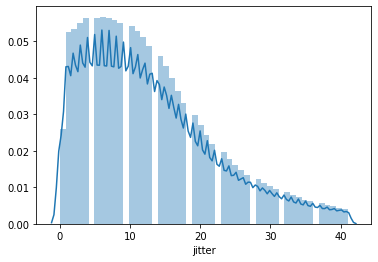

In [4]:
columns = ["StockID", "cum_volume", "cum_amount", "close", "bid1p", "bid2p", "bid3p", "bid4p", "bid5p", "bid1q", "bid2q",
           "bid3q", "bid4q", "bid5q", "ask1p", "ask2p", "ask3p", "ask4p", "ask5p", "ask1q", "ask2q", "ask3q",
           "ask4q", "ask5q", "openPrice"]
d1 = logSZ1[logSZ1["StockID"].isin(c12)]
d1 = d1[~d1.duplicated(columns, keep="first")].reset_index(drop=True)
d2 = logSZ2[logSZ2["StockID"].isin(c12)]
d2 = d2[~d2.duplicated(columns, keep="first")].reset_index(drop=True)
d = pd.concat([d1, d2]).reset_index(drop=True)
de = d[d.duplicated(columns, keep=False)]
de1 = de[de["exes"] == int(accountLs[0])]
de2 = de[de["exes"] == int(accountLs[1])]
de = pd.merge(de1, de2, on=columns)
del de1
del de2
de = de.rename(columns={"clockAtArrival_x": "caa1", "clockAtArrival_y": "caa2", "time_x": "time1", "time_y": "time2"})
de["caa_max"] = de[["caa1", "caa2"]].max(axis=1)
de["caa_min"] = de[["caa1", "caa2"]].min(axis=1)
de["jitter"] = de["caa_max"] - de["caa_min"]
display("1. time distribution:")
display(de["time1"].describe([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))
# check distribution of abs(difference)
display("2. jitter quantile(.5) and jitter distribution:")
display(de["jitter"].abs().quantile(0.5))
display(de["jitter"].abs().describe([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))
import seaborn as sns
from matplotlib import pyplot as plt
sns.distplot(de["jitter"].abs()[de["jitter"].abs() <= de["jitter"].abs().quantile(0.95)])
plt.show()
de["faster"] = np.where(de["caa_min"] == de["caa1"], int(accountLs[0]), int(accountLs[1]))
de[["time1", "faster", "jitter"]].to_pickle("E:\\jitter\\data\\" + server + "_SZE_snapshot.pkl")
# check mornings and afternoons are the same, check numbers don't change across days
display("3. check mornings and afternoons are the same, check numbers don't change across days")
display(de[(de["time1"] >= 93000000) & (de["faster"] == int(accountLs[0]))].head(30))
display(de[(de["time1"] >= 130000000) & (de["faster"] == int(accountLs[0]))].head(30))
display(de[(de["time1"] >= 93000000) & (de["faster"] == int(accountLs[1]))].head(30))
display(de[(de["time1"] >= 130000000) & (de["faster"] == int(accountLs[1]))].head(30))

mo = de[de["time1"] <= 93500000]
el = de[de["time1"] > 93500000]

n1 = mo["jitter"].abs().quantile(.5)
n2 = el["jitter"].abs().quantile(.5)
de1 = el.groupby(["faster"])["jitter"].count().reset_index()
de1 = de1.rename(columns={"jitter": "fastest_RestOfDay"})
de1 = pd.concat([de1, el.groupby(["faster"])["jitter"].quantile(.5).reset_index().iloc[:, 1:]], axis=1)
de1 = de1.rename(columns={"jitter": "jitter_RestOfDay"})
de1 = pd.concat([de1, mo.groupby(["faster"])["jitter"].count().reset_index().iloc[:, 1:]], axis=1)
de1 = de1.rename(columns={"jitter": "fastest_MktOpen"})
de1 = pd.concat([de1, mo.groupby(["faster"])["jitter"].quantile(.5).reset_index().iloc[:, 1:]], axis=1)
de1 = de1.rename(columns={"jitter": "jitter_MktOpen"})
de1["fastest_RestOfDay"] = de1["fastest_RestOfDay"] / de1["fastest_RestOfDay"].sum()
de1["fastest_RestOfDay"] = de1["fastest_RestOfDay"].apply(lambda x: '%.f%%'%(x*100))
de1["fastest_MktOpen"] = de1["fastest_MktOpen"] / de1["fastest_MktOpen"].sum()
de1["fastest_MktOpen"] = de1["fastest_MktOpen"].apply(lambda x: '%.f%%'%(x*100))
de1["jitter_RestOfDay"] = de1["jitter_RestOfDay"].abs()
de1["jitter_MktOpen"] = de1["jitter_MktOpen"].abs()
de1 = de1.rename(columns={"faster": "account"})
de1.loc[-1] = ["total", "", n2, "", n1]
de1.index = de1.index + 1
de1.sort_index(inplace=True)

list1 = de[de["faster"] == int(accountLs[0])]["time1"].describe([0.05, 0.5, 0.95])
list2 = de[de["faster"] == int(accountLs[1])]["time1"].describe([0.05, 0.5, 0.95])
t1 = [np.nan, list1["5%"], list2["5%"]]
t2 = [np.nan, list1["50%"], list2["50%"]]
t3 = [np.nan, list1["95%"], list2["95%"]]
de1["time_5p"] = pd.Series(t1)
de1["time_50p"] = pd.Series(t2)
de1["time_95p"] = pd.Series(t3)
de1["cat"] = "SZE snapshot"
for col in ["time_5p", "time_50p", "time_95p"]:
        de1[col] = de1[col].fillna(1)
        de1[col] = de1[col].astype(int)
        de1[col] = np.where(de1[col] == 1, '', de1[col])
de1 = de1.fillna("")
de1 = de1.loc[:, ["cat", "account", "fastest_MktOpen", "jitter_MktOpen", "fastest_RestOfDay", "jitter_RestOfDay",
                 "time_5p", "time_50p", "time_95p"]]
de1.to_csv("E:\\jitter\\result\\" + server + "_SZE_snapshot.csv", encoding="utf-8")
de1